In [1]:
import numpy as np
#from BlackScholes import *
#from GBMSim import *
from random import Random
from scipy import *

from sklearn import gaussian_process
from sklearn.gaussian_process.kernels import WhiteKernel, ConstantKernel, RBF

import matplotlib.pyplot as plt
plt.style.use('ggplot')
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

%matplotlib inline
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
import numpy as np

from random import Random
from scipy import *

from sklearn import gaussian_process
from sklearn.gaussian_process.kernels import WhiteKernel, ConstantKernel, RBF

import matplotlib.pyplot as plt
plt.style.use('ggplot')
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

import warnings
warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt
import numpy as np
from numpy import loadtxt
import pandas as pd
import matplotlib.ticker as mtick
import seaborn as sb
import seaborn as sns
import statsmodels.api as sm

import keras
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras import backend as K
from keras.layers import Embedding , GlobalAveragePooling1D
from keras.datasets import imdb
from keras.utils.generic_utils import get_custom_objects
keras.backend.set_floatx('float64')

from sklearn import  utils
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import *
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.linear_model import *
from sklearn.model_selection import *
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import *
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
#from xgboost import XGBRegressor
#%run lr_finder.ipynb 
import numpy as np
import scipy.stats as si
import scipy.integrate
from cmath import *
import warnings
warnings.filterwarnings("ignore")
import time
import pandas as pd
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import random
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

from numpy import *
from sklearn.cluster import KMeans
from matplotlib import animation
from scipy.interpolate import interp2d
%matplotlib inline

%matplotlib inline
%load_ext autoreload
%autoreload 2
%matplotlib inline

Using TensorFlow backend.


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import scipy.stats as st
import numpy as np
import math

def bsformula(cp, s, k, rf, t, v, div):
        """ Price an option using the Black-Scholes model.
        cp: +1/-1 for call/put
        s: initial stock price
        k: strike price
        t: expiration time
        v: volatility
        rf: risk-free rate
        div: dividend
        """

        d1 = (np.log(s/k)+(rf-div+0.5*v*v)*t)/(v*np.sqrt(t))
        d2 = d1 - v*np.sqrt(t)

        optprice = (cp*s*np.exp(-div*t)*st.norm.cdf(cp*d1)) - (cp*k*np.exp(-rf*t)*st.norm.cdf(cp*d2))
        delta = cp*st.norm.cdf(cp*d1)
        vega  = s*np.sqrt(t)*st.norm.pdf(d1)
        return optprice, delta, vega

In [3]:
import numpy as np
""" Simulate dynamics under GBM """ 

def gbm(S0, mu, sigma, T = 1., N = 10, M= 1000): 
    
    dt = T/ float(N) 
    S= np.array([S0]*(N+1)*M, dtype='float32').reshape(N+1, M)  
       
    for i in range(N):      
        dS = S[i,]*(mu*dt +  sigma*np.sqrt(dt)*np.random.randn(M))
        S[i+1,]=S[i,] + dS 
    
    return S


In [4]:
def trainGPs(x_train, f, timegrid):

    gps = []
    i = 0
    for time in timegrid:
        
        y_train = []
        
        for idx in range(len(x_train)):
             y_train.append(f(x_train[idx][0], time+0.001))
        y_train = np.array(y_train)

        sk_kernel = RBF(length_scale=1.0, length_scale_bounds=(0.01, 100.0))  #100000.0
        gp = gaussian_process.GaussianProcessRegressor(kernel=sk_kernel, n_restarts_optimizer=20)
        gp.fit(x_train,y_train)
        gps.append(gp)
        i += 1
    return gps   

In [5]:
def predictGPs(x_test, f, gps, timegrid):
    
    preds = []
    stds = []
    y_tests = []
    i = 0
    for time in timegrid:
        
        y_test_= []
        for idx in range(len(x_test)):
            y_test_.append(f(x_test[idx][0], time+0.001))
            
        y_test = np.array(y_test_)
        y_tests.append(y_test)
        
        # Find optimal model hyperparameters
        # Set into eval mode
        pred, std = gps[i].predict(x_test,return_std=True)
        preds.append(pred)
        stds.append(std)
        i+=1
    return y_tests, preds, stds 

# essai

In [6]:
def GenerateCorrelatedPaths(processArray, timeGrid, nPaths):
    times = []; [times.append(timeGrid[t]) for t in range(len(timeGrid))]
    generator = UniformRandomGenerator()
    nProcesses = processArray.size()
    nGridSteps = len(times) - 1 # deduct initial time (0.0)
    nSteps = nGridSteps * nProcesses
    sequenceGenerator = UniformRandomSequenceGenerator(nSteps, generator)
    gaussianSequenceGenerator = GaussianRandomSequenceGenerator(sequenceGenerator)
    multiPathGenerator = GaussianMultiPathGenerator(processArray, times, gaussianSequenceGenerator)
    paths = np.zeros(shape = (nPaths, nProcesses, len(timeGrid)))

    # loop through number of paths
    for i in range(nPaths):
        # request multiPath, which contains the list of paths for each process
        multiPath = multiPathGenerator.next().value()
        # loop through number of processes
        for j in range(multiPath.assetNumber()):
            # request path, which contains the list of simulated prices for a process
            path = multiPath[j]
            # push prices to array
            paths[i, j, :] = np.array([path[k] for k in range(len(path))])
    return paths

In [38]:
def generatepath(nProcesses,correlation,nPaths,nSteps, mue, spot, sigma,maturity):
    # mue est un veceteur de taille le nombre de processs
    # sigma aussi 
    #
    #
    process = []
    [process.append(GeometricBrownianMotionProcess(spot, mue, sigma)) for i in range(nProcesses)]

    cor=correlation
    matrix =[[1.0, cor,cor,cor,cor,cor,cor,cor,cor,cor], 
         [ cor,1.0,cor,cor,cor,cor,cor,cor,cor,cor],
         [ cor,cor,1.0,cor,cor,cor,cor,cor,cor,cor],
         [ cor,cor,cor,1.0,cor,cor,cor,cor,cor,cor],
         [cor,cor,cor,cor,1.0, cor,cor,cor,cor,cor],
         [ cor,cor,cor,cor,cor,1.0,cor,cor,cor,cor],
         [cor,cor,cor,cor,cor,cor,1.0,cor, cor,cor],
         [ cor,cor,cor,cor,cor,cor,cor,1.0,cor,cor],
         [ cor,cor,cor,cor,cor,cor,cor,cor,1.0,cor],
         [cor,cor,cor,cor,cor,cor,cor,cor,cor, 1.0]]


# create timegrid object and define number of paths
    
    timeGrid = TimeGrid(maturity, nSteps)

    # create StochasticProcessArray object
    # (array of correlated 1-D stochastic processes)
    processArray = StochasticProcessArray(process, matrix)
    # request simulated correlated paths for all processes
    # result array dimensions: nPaths, nProcesses, len(timeGrid)
    paths = GenerateCorrelatedPaths(processArray, timeGrid, nPaths)
    return (paths)

In [39]:
def price_basket(cp,mue,sigma, spot, K,maturity,nPaths,nProcesses, correlation,nSteps):
    paths= generatepath(nProcesses,correlation,nPaths,nSteps, mue, spot, sigma,maturity)
    final=paths[:,:,nSteps]
    a=[0]*nPaths
    if(cp==1): #on a un put
        for i in range(nPaths): # pour chaque chemin je recupére lesvaluers finaux des 10 stock et je prend le minimum
            a[i]=max(min(final[i])-K,0) # pour chaque path je calcule le max(min(final[i])-K ,0)
           # print(max(final[i]))
    else:
        for i in range(nPaths): # pour chaque chemin je recupére lesvaluers finaux des 10 stock et je prend le minimum
            a[i]=max(K-min(final[i]),0) # pour chaque path je calcule le max(min(final[i])-K ,0)
           # print(max(final[i]))
    price=mean(a)
    return (np.exp(-mue*maturity)*price)

In [40]:
from QuantLib import *
import numpy as np

In [45]:
from sklearn import gaussian_process
from sklearn.gaussian_process.kernels import WhiteKernel, ConstantKernel, RBF
nProcesses = 10
correlation = 0.7
maturity = 2
nSteps = 11
nPaths = 1500
mue=0.01
sigma=0.25
spot=100
K=100

In [46]:
# specify the portfolio
KC = 110    # Call strike
KP = 90     # Put strike
lb = 0.01
ub = 400
r  = 0
sigma = 0.3
nt = 11
T = 2.0
S0 = 100
timeGrid = TimeGrid(maturity, nSteps)


portfolio = {}
portfolio['call']={}
portfolio['put']={}

portfolio['call']['price']= lambda x,y:price_basket(1,mue,sigma, lb+(ub-lb)*x, K,y,nPaths,nProcesses, correlation,nSteps)
portfolio['put']['price']= lambda x,y: price_basket(-1,mue,sigma, lb+(ub-lb)*x, K,y,nPaths,nProcesses, correlation,nSteps)
portfolio['call']['weight']=2.0
portfolio['put']['weight']=-1.0

In [47]:
# prepare training and test data
training_number= 100
testing_number = 50
x_train = np.array(np.linspace(0.0,1.0, training_number), dtype='float32').reshape(training_number, 1)
x_test = np.array(np.linspace(0.0,1.0, testing_number), dtype='float32').reshape(testing_number, 1)

In [48]:
for key in portfolio.keys():
    portfolio[key]['GPs'] = trainGPs(x_train, portfolio[key]['price'], timeGrid)
    portfolio[key]['y_tests'], portfolio[key]['preds'], portfolio[key]['sigmas'] = predictGPs(x_test, portfolio[key]['price'], portfolio[key]['GPs'], timeGrid)

In [49]:
print('MSE call',np.sqrt(np.mean((np.array(portfolio['call']['y_tests'])- np.array(portfolio['call']['preds']))**2)))
print('MSE put',np.sqrt(np.mean((np.array(portfolio['put']['y_tests'])- np.array(portfolio['put']['preds']))**2)))

MSE call 1.7121570570483926
MSE put 0.30448966280703027


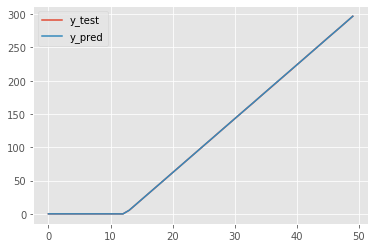

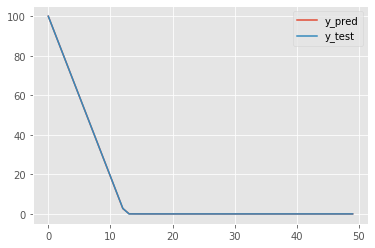

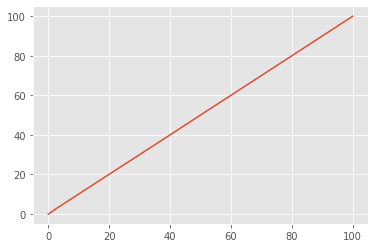

In [50]:
plt.plot(portfolio['call']['y_tests'][0],label='y_test')
plt.plot(portfolio['call']['preds'][0],label='y_pred')
plt.legend()
plt.show()
plt.plot(portfolio['put']['preds'][0],label='y_pred')
plt.plot(portfolio['put']['y_tests'][0],label='y_test')
plt.legend()
plt.show()
plt.plot(portfolio['put']['preds'][0],portfolio['put']['y_tests'][0])
   

In [33]:
mean_squared_error(portfolio['put']['preds'][0],portfolio['put']['y_tests'][0])
mean_squared_error(portfolio['call']['preds'][0],portfolio['call']['y_tests'][0])

0.004308257258396861

In [84]:
 import time as ti

In [85]:
def gbm(S0, mu, sigma, T = 1., N = 10, M= 1000): 
    
    dt = T/ float(N) 
    S= np.array([S0]*(N+1)*M, dtype='float32').reshape(N+1, M)  
       
    for i in range(N):      
        dS = S[i,]*(mu*dt +  sigma*np.sqrt(dt)*np.random.randn(M))
        S[i+1,]=S[i,] + dS 
    
    return S

In [107]:
def CVA_simulation(sim_params, model_params, def_model):
    
    n_sim_dt = sim_params['n_sim_dt'] # number of Euler stpes
    M        = sim_params['M']        # number of paths
    nt       = sim_params['nt']       # number of exposure dates
    timegrid = sim_params['timegrid'] # time grid of exposure dates
    
    r        = model_params['r']
    sigma    = model_params['sigma']
    T        = model_params['T'] 
    t0       = model_params['t0'] 
    S0       = model_params['S0'] 
    
    gamma_0  = def_model['gamma_0']
    gamma_1  = def_model['gamma_1']
    
    
    stride = n_sim_dt/(nt-1)
    idx = np.arange(0,n_sim_dt+1,stride, dtype=int)
    
    pi = {}
    pi['tilde'] = np.array([0.0]*(nt-1)*M, dtype='float32').reshape((nt-1), M)     # GP portfolio value
    pi['exact'] = np.array([0.0]*(nt-1)*M, dtype='float32').reshape((nt-1), M)     #  portfolio value
    pi['tilde_var'] = np.array([0.0]*(nt-1)*M, dtype='float32').reshape((nt-1), M) # GP portfolio variance
    gamma = np.array([0.0]*(nt-1)*M, dtype='float32').reshape((nt-1), M)           # hazard rates
    dPD = np.array([0.0]*(nt-1)*M, dtype='float32').reshape((nt-1), M)             # default probabilities
    
    #simulate underlying GBM dynamics using Euler
    S = gbm(S0, r, sigma, T-t0, n_sim_dt, M)
    
    if (def_model['calibrate']):
        x  = np.exp(S0/S)**gamma_1
        # default probability (assumed to be estimated from credit spread)
        dt = timegrid[1]-timegrid[0] 
        f  = lambda y: np.abs(np.mean(np.prod(x**(-y*dt), axis=0)) - def_model['p']) 
        res = sp.optimize.basinhopping(f, 0.1, niter=10)
        i = 1   
        while (abs(res.fun) >1e-3):   
          res = sp.optimize.basinhopping(f,0.1,niter=100*i)
          i *= 2
        gamma_0= res.x[0]
        print("calibration:",gamma_0,gamma_1,f(gamma_0),res.fun)  
  
    start=ti.time()
    for m in range(M):  
      i = 1 
      exp_factor=1
        
      for time in timegrid[1:]:
        dt = timegrid[i]-timegrid[i-1] 
        
        S_= S[idx[i],m] # simulated S
        # avoid simulated S breaching boundaries of domain
        if (S_<lb):
            mins=S_
            S_=lb
        if (S_>ub):
            S_=ub
            maxs=S_
    
        pred_= 0
        v_ = 0
        var_ =0 
        start0 = ti.time()
        for key in portfolio.keys():
           pred, std = portfolio[key]['GPs'][i].predict(np.array([(S_-lb)/(ub-lb)]).reshape(1,-1),return_std=True) 
           pred_ += portfolio[key]['weight']*pred
           var_ += (portfolio[key]['weight']*std)**2 
        start1 = ti.time()
        for key in portfolio.keys():
            if key=='call':
                v_ += portfolio[key]['weight']*price_basket(1,r,sigma,S_.item(),KC,time[0].item() ,nPaths,nProcesses, correlation,nSteps)
            else:
                v_ += portfolio[key]['weight']*price_basket(-1,r,sigma,S_.item(),KP,time[0].item(),nPaths,nProcesses, correlation,nSteps)
                
                
        pi['tilde'][i-1,m] = np.maximum(pred_,0)
        pi['exact'][i-1,m] = np.maximum(v_,0)
        pi['tilde_var'][i-1,m] =var_ 
          
        # default intensity model
        gamma[i-1,m] = gamma_0*(S0/S_)**gamma_1    
        
        # compute default probabilities  
        exp_factor*=np.exp(-dt*gamma[i-1,m])    
        dPD[i-1,m]= gamma[i-1,m]*exp_factor
        
        i += 1
    end0 = ti.time() 
    print("la totalité du calcul dure ")
    print((end0 - start)) 
    print("le GP dure")
    print((end0 - start0)*M) 
    print("le tbenchmark dure dure")
    print((end0 - start1)*M) 
    # compute CVA
    i = 0
    CVA ={}
    CVA['tilde'] = 0
    CVA['exact'] = 0
    CVA['tilde_up'] = 0
    CVA['tilde_down'] = 0
   
    for time in timegrid[1:]:
        dt = timegrid[i+1]-timegrid[i]
        mu_tilde = np.mean(dPD[i,:]*pi['tilde'][i,:])*np.exp(-r*(time-t0))*dt
        CVA['tilde'] += mu_tilde
        std_err_MC = np.std(dPD[i,:]*pi['tilde'][i,:])*np.exp(-r*(time-t0))*dt/np.sqrt(M)
        CVA['tilde_up'] += mu_tilde + 2.0*std_err_MC
        CVA['tilde_down'] += mu_tilde - 2.0*std_err_MC
        CVA['exact'] += np.mean(dPD[i,:]*pi['exact'][i,:])*np.exp(-r*(time-t0))*dt
        i+=1
    CVA['tilde'] *= (1-def_model['recovery'])
    CVA['tilde_up'] *= (1-def_model['recovery'])
    CVA['tilde_down'] *= (1-def_model['recovery'])
    CVA['exact'] *= (1-def_model['recovery'])
        
    return(CVA, pi)

# CVA

In [108]:
sim_params = {}
model_params = {}
def_model = {}
  
model_params['r'] = r        # risk-free rate
model_params['sigma'] = sigma  # implied volatility
model_params['T'] = maturity        # Time to maturity 
model_params['t0'] = 0
model_params['S0'] = S0     # Underlying spot
     
# parameters to the default intensity model    
def_model['gamma_0'] = 0.01
def_model['gamma_1'] = 1.2
def_model['calibrate'] = False    
def_model['recovery'] = 0.4

sim_params['n_sim_dt'] = 100 # number of Euler stpes
sim_params['M']  = 200     # number of paths
sim_params['nt'] = nt        # number of exposure dates
timegrid = np.array(np.linspace(0.0,T,nt), dtype='float32').reshape(nt, 1)
sim_params['timegrid']= timegrid # time grid of exposure dates

In [109]:
# train and predict over portfolio

CVA_0, pi = CVA_simulation(sim_params, model_params, def_model)


la totalité du calcul dure 
378.15966796875
le GP dure
36.580610275268555
le tbenchmark dure dure
36.51714324951172


In [110]:
CVA_0

{'tilde': array([0.04737453], dtype=float32),
 'exact': array([0.03192904], dtype=float32),
 'tilde_up': array([0.06318804], dtype=float32),
 'tilde_down': array([0.031561], dtype=float32)}

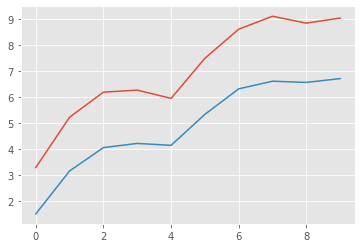

In [111]:
plt.plot(np.mean(pi['tilde'],axis=1))
plt.plot(np.mean( pi['exact'], axis = 1))

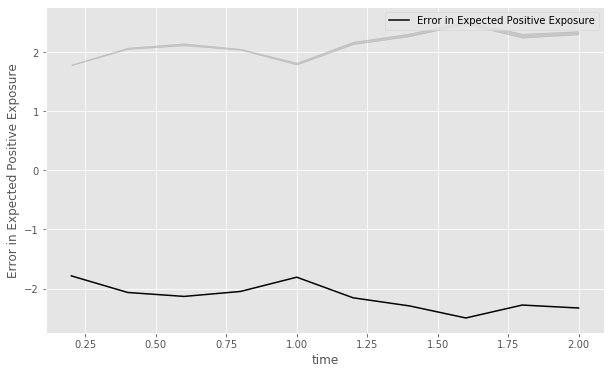

In [112]:
# Error plot
up = np.mean(pi['tilde'], axis=1) -np.mean(pi['exact'], axis=1)+2.0*np.sqrt(np.mean(pi['tilde_var'], axis=1))   # 95% confident interval 
down = np.mean(pi['tilde'], axis=1) -np.mean(pi['exact'], axis=1)- 2.0*np.sqrt(np.mean(pi['tilde_var'], axis=1))   # 95% confident interval 

plt.figure(figsize = (10,6),facecolor='white', edgecolor='black')
plt.plot(timegrid[1:], np.mean(pi['exact'], axis=1)-np.mean(pi['tilde'], axis=1), color = 'black', label = 'Error in Expected Positive Exposure')
plt.fill_between(timegrid[1:].flatten(), np.array(down), np.array(up), color = 'grey', alpha=0.3)
plt.grid(True)
#plt.xlim(90, 110)
plt.xlabel('time')
plt.ylabel('Error in Expected Positive Exposure')
plt.legend(loc = 'best', prop={'size':10})

In [113]:
vect=[np.mean(pi['tilde'][i]) for i in range(10)]
vect1=[np.mean(pi['exact'][i]) for i in range(10)]

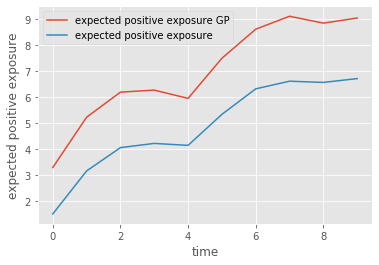

In [114]:
temps=range(nt-1)
plt.plot(temps,vect,label='expected positive exposure GP')
plt.plot(temps,vect1,label='expected positive exposure')
plt.xlabel('time')
plt.ylabel('expected positive exposure')
plt.legend()